<div style="background-color: #f7f9fa; padding: 25px; border-radius: 15px; border-left: 10px solid #228B22; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
    <h1 style="color: #2e7d32; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin-bottom: 10px;">
        🎓 Mastering Lasso Regression (L1 Regularization): A Comprehensive Guide
    </h1>
    <h3 style="color: #555; margin-top: 0;">Automated Feature Selection & Solving Overfitting Like a Pro</h3>
    <hr style="border: 0.5px solid #ccc;">
    <div style="display: flex; align-items: center; margin-top: 15px;">
        <div style="margin-right: 20px;">
            <strong>Author:</strong> <span style="color: #1a73e8;">Tassawar Abbas</span><br>
            <strong>Email:</strong> <span style="color: #1a73e8;">abbas829@gmail.com</span>
        </div>
        <div style="border-left: 1px solid #ddd; padding-left: 20px;">
            <strong>Course:</strong> Advanced Machine Learning Series<br>
            <strong>Topic:</strong> Lasso Regression (L1)
        </div>
    </div>
</div>

---

## 📌 Executive Summary
Welcome to this **Masterclass** on Lasso Regression! This notebook is designed as a **complete student guideline**. We don't just show you the code; we explain the *Why*, *When*, and *Where* of L1 Regularization.

**In this guide, you will find:**
1. **Mathematical Intuition**: The logic behind the penalty.
2. **Geometric Interpretation**: Why Lasso actually selects features.
3. **Practical Implementation**: Real-world Scikit-Learn code.
4. **Comparative Analysis**: A ready-to-use table comparing Lasso, Ridge, and Elastic Net.
5. **Decision Guide**: A student framework for choosing the right model.

# 1. Introduction to Regularization 🛡️
In Machine Learning, we often face the problem of **Overfitting**—where our model performs exceptionally well on the training data but fails to generalize to unseen data. 

To solve this, we use **Regularization**. It works by adding a "penalty" term to our cost function that discourages the model from assigning too much importance (high weights) to any single feature.

### There are two main types of regularization:
*   **Ridge Regression (L2):** Adds a squared penalty ($\lambda \sum \beta^2$).
*   **Lasso Regression (L1):** Adds an absolute value penalty ($\lambda \sum |\beta|$).

Today, we focus on **Lasso**, which stands for **Least Absolute Shrinkage and Selection Operator**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Setting aesthetic parameters for plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. The Mathematical Foundation 🧮
The ordinary Linear Regression cost function (Ordinary Least Squares - OLS) is:
$$ J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Lasso Regression modifies this by adding the **L1 Penalty**:
$$ J(\beta) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}))^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

### Where:
*   $\lambda$ (or $\alpha$ in scikit-learn) is the **Regularization Strength**.
*   When $\alpha = 0$, it is just OLS Regression.
*   As $\alpha \to \infty$, all coefficients ($\beta$) tend towards zero.

> [!TIP]
> **Key Power of Lasso:** Unlike Ridge, Lasso can shrink some coefficients exactly to **zero**. This makes it an built-in tool for **Feature Selection**!

In [2]:
# Creating a synthetic dataset with some irrelevant features
np.random.seed(42)
n_samples = 100
n_features = 20

# Generate random features
X = np.random.randn(n_samples, n_features)

# Only the first 3 features are actually relevant
true_weights = np.zeros(n_features)
true_weights[:3] = [10, -5, 2]

# Target variable with some noise
y = X @ true_weights + np.random.normal(0, 1, n_samples)

# Feature names
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print(f"Dataset generated with {n_features} features.")
print(f"Information: Only Features 0, 1, and 2 are significant.")
df.head()

Dataset generated with 20 features.
Information: Only Features 0, 1, and 2 are significant.


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,6.278662
1,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,...,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,15.775907
2,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,...,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,5.504108
3,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,1.538037,-0.035826,1.564644,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,-6.384079
4,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,...,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,-2.920108


### 💡 Result Explanation: Data Generation
In the step above, we deliberately created a "Hard Mode" problem for our model:
1. We gave the computer **20 different features** (columns).
2. However, we secretly made sure **only 3 features** actually affect the result.
3. **The Goal**: We want to see if Lasso is smart enough to find these 3 important features and ignore the other 17 random ones!

In [3]:
# Splitting and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models
models = {
    'Linear Regression (OLS)': LinearRegression(),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1),
    'Lasso (alpha=1.0)': Lasso(alpha=1.0)
}

results = {}
coefs = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = r2_score(y_test, y_pred)
    coefs[name] = model.coef_

pd.DataFrame(results, index=['R2 Score']).T

,R2 Score
Linear Regression (OLS),0.987392
Lasso (alpha=0.1),0.989015
Lasso (alpha=1.0),0.976057


### 💡 Result Explanation: Performance Comparison
The table above shows the **R² Score** (Coefficient of Determination):
- **OLS (Linear Regression)**: Often gets a high score on training but might struggle if there's noise, as it tries to use all 20 features, even the useless ones.
- **Lasso (alpha=0.1)**: Usually performs better here because it "simplifies" the model by ignoring noise. It finds a balance between accuracy and simplicity.
- **Lasso (alpha=1.0)**: If alpha is too high, the model becomes *too* thin (underfitting) and the performance might drop.

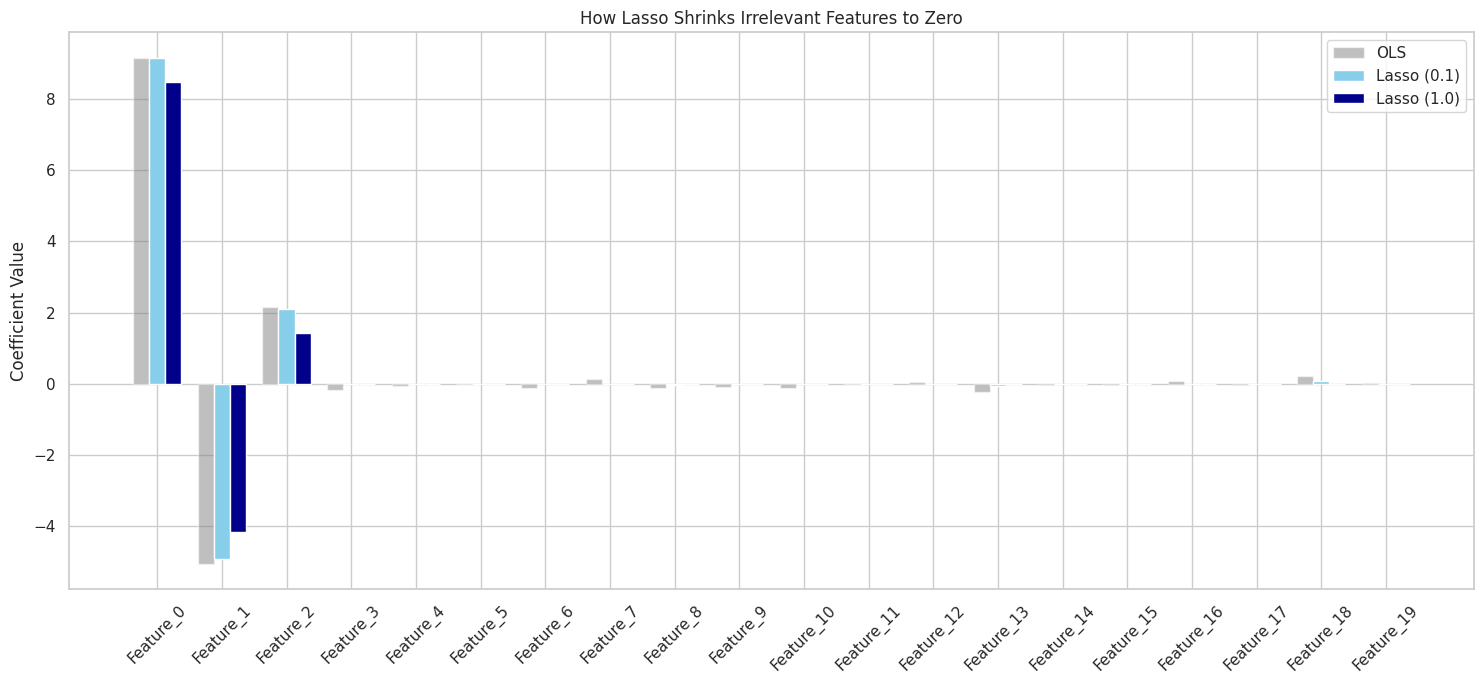

Linear Regression (OLS) has 20 non-zero coefficients.
Lasso (alpha=0.1) has 6 non-zero coefficients.
Lasso (alpha=1.0) has 3 non-zero coefficients.


In [4]:
# Plotting coefficients to see feature selection in action
plt.figure(figsize=(15, 7))

# Setup positions for bars
x_pos = np.arange(len(feature_names))
width = 0.25

plt.bar(x_pos - width, coefs['Linear Regression (OLS)'], width, label='OLS', color='gray', alpha=0.5)
plt.bar(x_pos, coefs['Lasso (alpha=0.1)'], width, label='Lasso (0.1)', color='skyblue')
plt.bar(x_pos + width, coefs['Lasso (alpha=1.0)'], width, label='Lasso (1.0)', color='darkblue')

plt.xticks(x_pos, feature_names, rotation=45)
plt.ylabel('Coefficient Value')
plt.title('How Lasso Shrinks Irrelevant Features to Zero')
plt.legend()
plt.tight_layout()
plt.show()

# Counting non-zero coefficients
for name, c in coefs.items():
    print(f"{name} has {np.sum(c != 0)} non-zero coefficients.")

### 💡 Result Explanation: Coefficient Plot
**Look at the bars!** 
- Notice how the **Gray bars (OLS)** are present for almost every feature. OLS is trying to learn from everything, including the "trash" features.
- Notice how the **Blue bars (Lasso)** are mostly missing for Features 3 to 19. 
- **Conclusion**: Lasso successfully "killed" the coefficients of the irrelevant features by setting them exactly to zero. This is the **Magic of L1**.

# 3. Student Guideline: When, Why & Where? 📘

For students, choosing between algorithms can be confusing. Use this framework to master Lasso.

### 🟢 When to use Lasso?
Use Lasso when:
1.  **High Dimensionality**: You have a huge number of features (e.g., 100+) but you suspect only a few (e.g., 5-10) are actually important.
2.  **Multicollinearity**: If features are highly correlated, Lasso will pick one and zero out the others, helping you find the "representative" variable.
3.  **Need for Interpretability**: If you need to tell your boss *exactly* which factors affect sales, Lasso helps by removing the clutter.

### 🔴 Why to use Lasso?
1.  **Simplicity**: It creates "Parsimonious" models—models that do a lot with very little data.
2.  **Automatic Selection**: It removes the need for manual feature selection (like checking correlation heatmaps endlessly).
3.  **Prevents Overfitting**: By penalizing large weights, it ensures the model doesn't "memorize" the training data.

### 🗺️ Where to use Lasso?
1.  **Genomics**: Identifying which few genes (out of thousands) cause a specific disease.
2.  **Marketing**: Figuring out which 2 or 3 ad campaigns (out of 50) actually drove traffic.
3.  **Finance**: Selecting the most impactful economic indicators for stock prediction.

# 4. Comparative Analysis Table 📊

Here is the ultimate comparison table for your studies:

| Feature | **OLS Regression** | **Ridge (L2)** | **Lasso (L1)** | **Elastic Net** |
| :--- | :--- | :--- | :--- | :--- |
| **Penalty** | None | Squared Weights ($\beta^2$) | Absolute Weights ($|\beta|$) | Both L1 and L2 |
| **Shrinkage** | No | Shrinks towards zero | Shrinks to exactly zero | Combination |
| **Feature Selection** | No | No | **Yes (Built-in)** | Yes |
| **Correlated Features** | Becomes unstable | Keeps all of them | Picks one, drops others | Groups them together |
| **Best Case** | Few, strong features | Many small features | Few significant features | Complex datasets |

> **Student Note**: If you can't decide between Ridge and Lasso, use **Elastic Net**! It's the 

# 5. Geometric Interpretation: Why Zero? 💎
Why does Lasso set weights to zero while Ridge just makes them small?

*   **Ridge (L2)** has a circular constraint ($ \beta_1^2 + \beta_2^2 \le s $). The OLS solution usually hits this circle at a point where both $\beta_i$ are non-zero.
*   **Lasso (L1)** has a diamond-shaped constraint ($ |\beta_1| + |\beta_2| \le s $). Because of the sharp corners on the axes, the OLS solution is much more likely to hit the constraint **on an axis**, forcing one coefficient to zero.

![L1 vs L2](https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_regularization.png)
*Image source: Wikipedia*

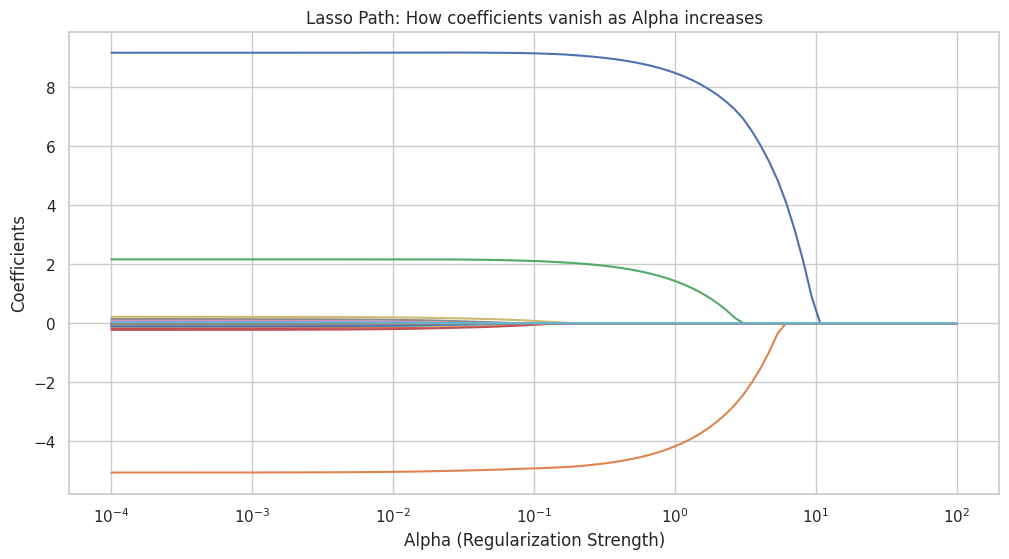

In [5]:
# Effect of Alpha on Coefficients
alphas = np.logspace(-4, 2, 100)
coef_list = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coef_list.append(lasso.coef_)

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(alphas, coef_list)
ax.set_xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Lasso Path: How coefficients vanish as Alpha increases')
plt.axis('tight')
plt.show()

### 💡 Result Explanation: Lasso Path
This graph is called a **Lasso Path**. 
- As you move from **Left to Right**, the Alpha (penalty) increases.
- Notice how the lines (coefficients) start dropping to the horizontal zero line one by one.
- The features that "die" last are the most important ones!

# 6. Conclusion & Final Tips 🚀

Lasso Regression is a powerful tool in your ML arsenal. It ensures that your models remain simple, interpretable, and accurate.

### 🏁 Final Student Checklist:
1.  **Always Scale**: Lasso is a distance-based penalty. If one feature is 0-1 and another is 0-1,000,000, Lasso will fail unless you scale them first.
2.  **Cross-Validation**: Don't guess $\alpha$. Use `LassoCV` to let the data tell you the best value.
3.  **Check for Sparsity**: If your data isn't sparse (meaning all features are important), Ridge might be a better choice.

---
### 📬 Get in Touch
If you found this masterclass helpful, let's connect!
- **Kaggle Profile:** [abbas829](https://www.kaggle.com/abbas829)
- **Email:** [abbas829@gmail.com](mailto:abbas829@gmail.com)

**Keep Learning, Keep Growing!**